# Download Dataset

In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-04-06 00:42:13--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2022-04-06 00:42:13 (139 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [ ]:
import json

# load the JSON file
with open('./sarcasm.json', 'r') as f:
  datastore = json.load(f)

# inisiasi list
sentences = []
labels = []

# collect sentences and labels into the list
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

# Hyperparameter

In [ ]:
# number of example
training_size = 20000

# vocabulary size
vocab_size = 10000

# mximum length of padded
max_length = 32

# output dimensions
embedding_dim = 16

# Split Dataset

In [ ]:
# split sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Preprocessing the train and test dataset

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# parameter for padding and OOV tokens
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

# inisiasi class tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

# Build models

In [ ]:
import tensorflow as tf

In [ ]:
# inisiasi GlobalAveragePooling1D (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# define sample array
sample_array = np.array([[[10, 2], [1, 3], [1, 1]]])

# print shape and contents of sample array
print(f"shape of sample array = {sample_array.shape}")
print(f"sample array : {sample_array}")

# pass the sample array to GAP1D layer
output = gap1d_layer(sample_array)

# print shape and contents of GAP1D output array
print(f"output shape of GAP1D layer : {output.shape}")
print(f"output array of GAP1D layer : {output.numpy()}") 

shape of sample array = (1, 3, 2)
sample array : [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of GAP1D layer : (1, 2)
output array of GAP1D layer : [[4 2]]


In [ ]:
# build model
model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
      tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model

In [ ]:
num_epochs = 30

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.5619 - accuracy: 0.6996 - val_loss: 0.4049 - val_accuracy: 0.8223 - 3s/epoch - 5ms/step
Epoch 2/30
625/625 - 2s - loss: 0.3072 - accuracy: 0.8752 - val_loss: 0.3400 - val_accuracy: 0.8568 - 2s/epoch - 4ms/step
Epoch 3/30
625/625 - 2s - loss: 0.2302 - accuracy: 0.9085 - val_loss: 0.3453 - val_accuracy: 0.8505 - 2s/epoch - 4ms/step
Epoch 4/30
625/625 - 2s - loss: 0.1861 - accuracy: 0.9299 - val_loss: 0.3610 - val_accuracy: 0.8536 - 2s/epoch - 4ms/step
Epoch 5/30
625/625 - 2s - loss: 0.1534 - accuracy: 0.9440 - val_loss: 0.3976 - val_accuracy: 0.8450 - 2s/epoch - 4ms/step
Epoch 6/30
625/625 - 3s - loss: 0.1289 - accuracy: 0.9544 - val_loss: 0.4281 - val_accuracy: 0.8430 - 3s/epoch - 4ms/step
Epoch 7/30
625/625 - 4s - loss: 0.1098 - accuracy: 0.9625 - val_loss: 0.4702 - val_accuracy: 0.8393 - 4s/epoch - 6ms/step
Epoch 8/30
625/625 - 3s - loss: 0.0942 - accuracy: 0.9697 - val_loss: 0.5062 - val_accuracy: 0.8387 - 3s/epoch - 5ms/step
Epoch 9/30
625/625 - 3s 

# Visualize the Results

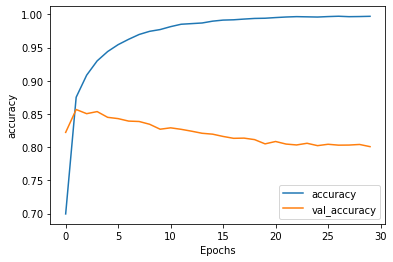

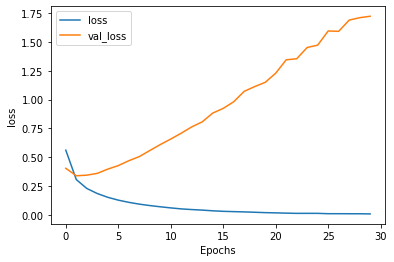

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")